In [3]:
import pandas as pd

In [32]:
claims_df = pd.read_csv('../IBM_Debater_(R)_CE-EMNLP-2015.v3/current_working_dataset/claims.csv')
claims_df

,Topic,Claim original text,Claim corrected version
0,This house believes that the sale of violent v...,Exposure to violent video games causes at leas...,exposure to violent video games causes at leas...
1,This house believes that the sale of violent v...,video game violence is not related to serious ...,video game violence is not related to serious ...
2,This house believes that the sale of violent v...,some violent video games may actually have a p...,some violent video games may actually have a p...
3,This house believes that the sale of violent v...,exposure to violent video games causes both sh...,exposure to violent video games causes both sh...
4,This house believes that the sale of violent v...,Violent video games increase the violent tende...,they increase the violent tendencies among youth
...,...,...,...
2289,This house would enforce term limits on the le...,"Term limits won't affect gridlock, being a qui...","Term limits won't affect gridlock, being a qui..."
2290,This house would enforce term limits on the le...,Limiting terms deprives voters of the right to...,Limiting terms deprives voters of the right to...
2291,This house would enforce term limits on the le...,The lack of mandatory limits to tenure is rega...,the lack of mandatory limits to tenure as a da...
2292,This house would enforce term limits on the le...,contact with the affairs of state is one of th...,contact with the affairs of state is one of th...


In [103]:
evidence_df = pd.read_csv('../IBM_Debater_(R)_CE-EMNLP-2015.v3/current_working_dataset/evidence.csv')
evidence_df.columns = ["Topic", "Claim original text", "Evidence", "Type of Evidence Information"]
evidence_df_factorized = evidence_df.apply(lambda s: s.map({k:i for i,k in enumerate(s.unique())}))

In [104]:
evidence_df_factorized_topic_0 = evidence_df_factorized.loc[evidence_df_factorized["Topic"] == 0]
evidence_df_factorized_topic_0_claim_0 = evidence_df_factorized_topic_0.loc[evidence_df_factorized_topic_0["Claim original text"] == 0]

In [105]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
G = nx.Graph()

In [109]:
G = nx.from_pandas_edgelist(evidence_df_factorized_topic_0_claim_0, source='Evidence', target='Claim original text', edge_attr=True, create_using=nx.DiGraph())

color_map = []

for node in G:
    if node > 0:
        color_map.append("green")
    else:
        color_map.append("blue")


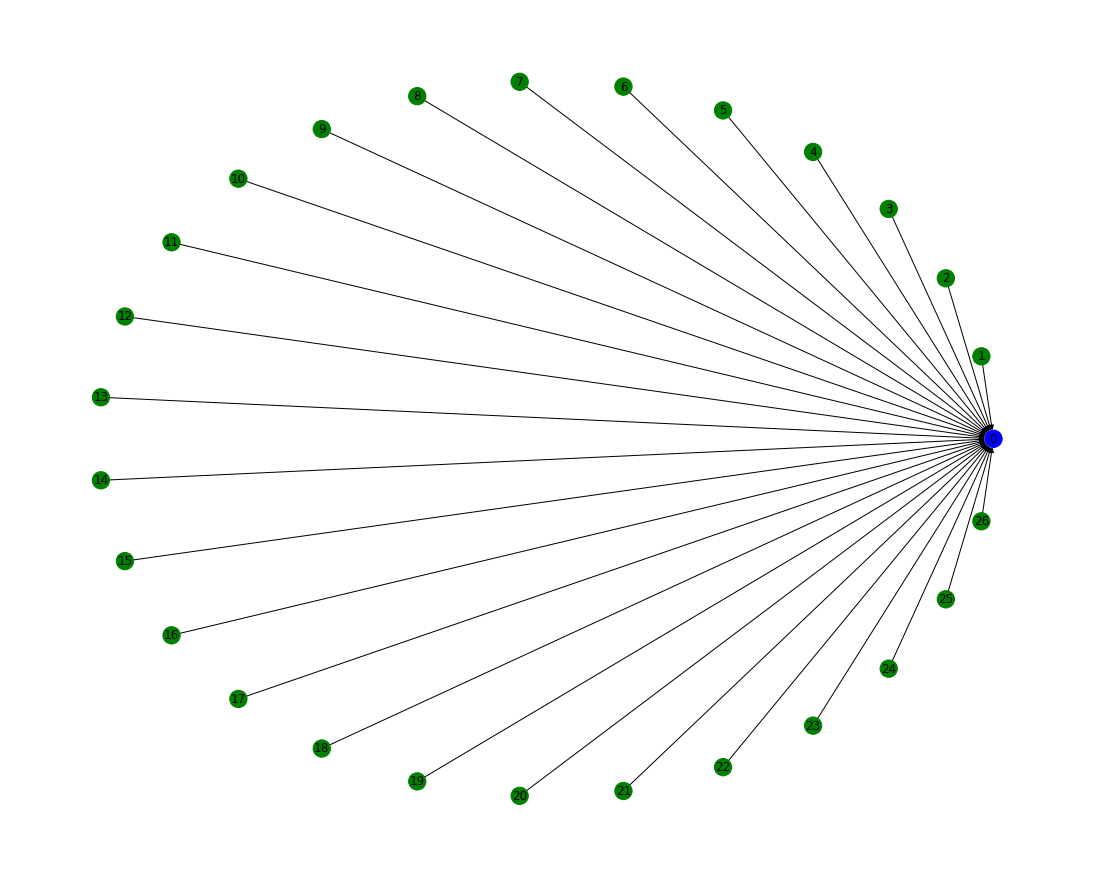

In [110]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_circular(G, with_labels=True, node_color=color_map)

In [111]:
# Convert strings to dictionary and map to appropriate columns

evidence_df['Count'] = [len(evidence_df[evidence_df['Evidence'].str.contains(value)]) for index, value in enumerate(evidence_df['Claim original text'])]

error: unterminated character set at position 81